# Linear Regression


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [6]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

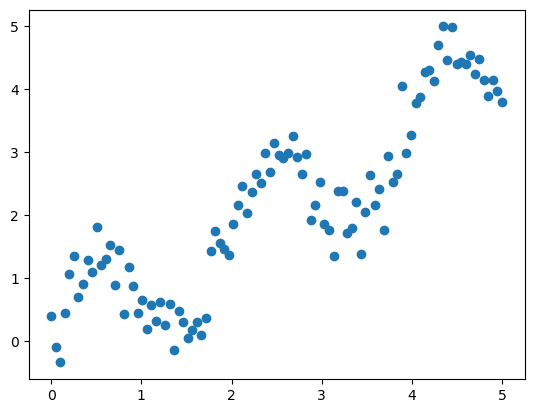

In [7]:
plt.scatter(x,y)

#### nonlinear

In [9]:
regr_lin = LinearRegression()

In [10]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [11]:
regr_lin.fit(X,y)

LinearRegression()

0.5211259425056866


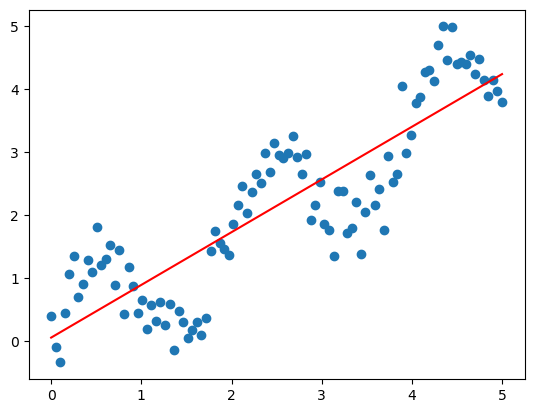

In [12]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [16]:
print(x.shape)

(100,)


In [19]:
# X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x]) 
X_poly = np.array([[k, k**2, k**3, k**4, k**5, k**6] for k in x]) # add k**6 to try it
print(X_poly.shape)

(100, 6)


In [27]:
regr_poly = LinearRegression()

In [29]:
regr_poly.fit(X_poly, y)

LinearRegression()

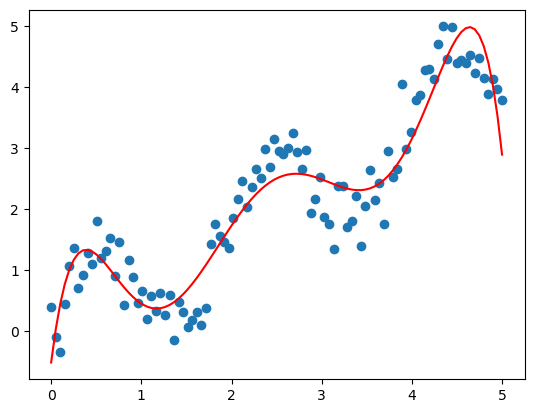

In [31]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [33]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [ 11.91149683 -25.65328955  21.68312291  -8.37771464   1.50369302
  -0.10164317]
interception:  -0.5173396318335963


In [35]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b  # .T轉置 因為現在是矩陣乘法

array([-0.51733963,  0.02155507,  0.44559073,  0.76963838,  1.0073768 ,
        1.1713488 ,  1.27301622,  1.32281379,  1.33020174,  1.30371719,
        1.25102436,  1.17896349,  1.09359866,  1.00026428,  0.90361046,
        0.80764707,  0.71578669,  0.63088627,  0.55528759,  0.49085653,
        0.4390211 ,  0.40080828,  0.37687961,  0.3675656 ,  0.3728989 ,
        0.39264629,  0.42633939,  0.47330424,  0.53268963,  0.60349413,
        0.6845921 ,  0.77475827,  0.87269125,  0.9770358 ,  1.08640381,
        1.19939415,  1.31461132,  1.43068275,  1.54627507,  1.66010899,
        1.77097313,  1.87773649,  1.9793598 ,  2.07490561,  2.16354719,
        2.24457622,  2.31740921,  2.38159279,  2.43680772,  2.48287169,
        2.51974098,  2.54751077,  2.56641439,  2.57682123,  2.57923349,
        2.57428173,  2.56271919,  2.54541483,  2.52334532,  2.4975856 ,
        2.46929842,  2.43972254,  2.4101598 ,  2.38196086,  2.35650988,
        2.33520786,  2.31945479,  2.31063069,  2.31007523,  2.31

In [37]:
regr_poly.predict(X_poly)

array([-0.51733963,  0.02155507,  0.44559073,  0.76963838,  1.0073768 ,
        1.1713488 ,  1.27301622,  1.32281379,  1.33020174,  1.30371719,
        1.25102436,  1.17896349,  1.09359866,  1.00026428,  0.90361046,
        0.80764707,  0.71578669,  0.63088627,  0.55528759,  0.49085653,
        0.4390211 ,  0.40080828,  0.37687961,  0.3675656 ,  0.3728989 ,
        0.39264629,  0.42633939,  0.47330424,  0.53268963,  0.60349413,
        0.6845921 ,  0.77475827,  0.87269125,  0.9770358 ,  1.08640381,
        1.19939415,  1.31461132,  1.43068275,  1.54627507,  1.66010899,
        1.77097313,  1.87773649,  1.9793598 ,  2.07490561,  2.16354719,
        2.24457622,  2.31740921,  2.38159279,  2.43680772,  2.48287169,
        2.51974098,  2.54751077,  2.56641439,  2.57682123,  2.57923349,
        2.57428173,  2.56271919,  2.54541483,  2.52334532,  2.4975856 ,
        2.46929842,  2.43972254,  2.4101598 ,  2.38196086,  2.35650988,
        2.33520786,  2.31945479,  2.31063069,  2.31007523,  2.31

In [39]:
Y=regr_poly.predict(X_poly)
mse = np.sum((Y-y)**2) / len(y)
print(mse)

0.21153456728807538


#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [43]:
# 用常態分佈的方式
# normal distrubution
def RBF(x, center, sigma):  # center 平均值  sigma 標準差
    k = np.exp(-(x - center)**2/(2*sigma**2))  # np.exp(x) = e**x
    return k

In [45]:
sigma = 0.3

In [47]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])   #center 是每個峰值的點
X_rbf


array([[2.49352209e-01, 3.72665317e-06, 8.32396968e-16, 2.77873902e-30,
        1.38634329e-49],
       [3.25472872e-01, 8.52574586e-06, 3.33776477e-15, 1.95292168e-29,
        1.70773187e-48],
       [4.12959721e-01, 1.89599467e-05, 1.30098499e-14, 1.33417628e-28,
        2.04484269e-47],
       [5.09321387e-01, 4.09857759e-05, 4.92924229e-14, 8.85998378e-28,
        2.38007940e-46],
       [6.10614979e-01, 8.61232743e-05, 1.81542941e-13, 5.71931425e-27,
        2.69286330e-45],
       [7.11597342e-01, 1.75913523e-04, 6.49934950e-13, 3.58877569e-26,
        2.96161426e-44],
       [8.06106646e-01, 3.49276399e-04, 2.26178717e-12, 2.18897091e-25,
        3.16616832e-43],
       [8.87650512e-01, 6.74109702e-04, 7.65111808e-12, 1.29785145e-24,
        3.29026462e-42],
       [9.50129573e-01, 1.26468753e-03, 2.51587693e-11, 7.47999499e-24,
        3.32367827e-41],
       [9.88587205e-01, 2.30636063e-03, 8.04165068e-11, 4.19052994e-23,
        3.26361145e-40],
       [9.99858301e-01, 4.0884

In [49]:
regr_rbf = LinearRegression()

In [51]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

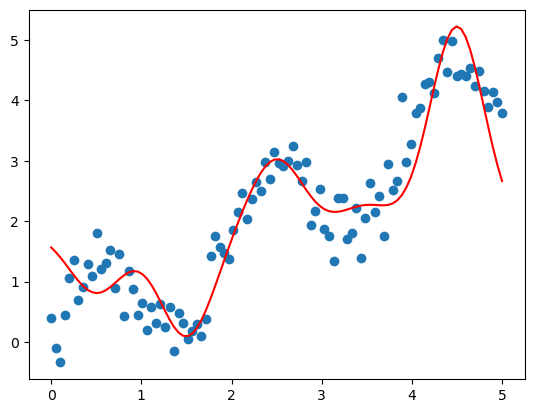

In [52]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [53]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.99743374 -1.72022822  1.21563895  0.43774829  3.40547192]
interception:  1.8134938282235675


#### Comparison

In [55]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

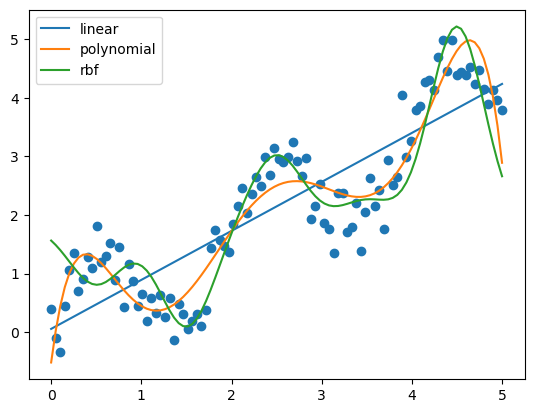

In [56]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [58]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5211259425056866


In [59]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.21153456728807538


In [61]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.29451833162178803
